<a href="https://colab.research.google.com/github/sam0786-xyz/Machine-Learning/blob/main/Loan_Repayment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
!kaggle datasets download -d mamtadhaker/lt-vehicle-loan-default-prediction #This loads the dataset fom kaggle in a zip format.

Dataset URL: https://www.kaggle.com/datasets/mamtadhaker/lt-vehicle-loan-default-prediction
License(s): other
 43% 5.00M/11.5M [00:00<00:00, 34.4MB/s]
100% 11.5M/11.5M [00:00<00:00, 59.8MB/s]


In [ ]:
!unzip lt-vehicle-loan-default-prediction

Archive:  lt-vehicle-loan-default-prediction.zip
  inflating: data_dictionary.csv     
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [ ]:
df.isnull().sum() #To check Null values

,0
UniqueID,0
disbursed_amount,0
asset_cost,0
ltv,0
branch_id,0
supplier_id,0
manufacturer_id,0
Current_pincode_ID,0
Date.of.Birth,0
Employment.Type,7661


In [ ]:
#Employment type contains 2 options i.e., Salaried & Self_Employed (Norminal)
df['Employment.Type'].fillna(df['Employment.Type'].mode()[0], inplace=True)

In [ ]:
from datetime import datetime

reference_date = datetime(2019, 1, 4)

df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], errors='coerce')
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], errors='coerce')

df['Age'] = (reference_date - df['Date.of.Birth']).dt.days // 365

df['Loan_Tenure_Months'] = (reference_date - df['DisbursalDate']).dt.days / 30

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
print('numerical_features: \n', numerical_features)
print('categorical_features: \n', categorical_features)

numerical_features: 
 Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'Loan_Tenure_Months'],
      dtype='object')
categorical_features: 
 Index(['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# One-Hot Encoding for Employment.Type
df = pd.get_dummies(df, columns=['Employment.Type'], prefix='Employment', drop_first=True)

# Label Encoding for PERFORM_CNS.SCORE.DESCRIPTION
label_encoder = LabelEncoder()
df['PERFORM_CNS.SCORE.DESCRIPTION'] = label_encoder.fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [ ]:
import re

def total_months(df_column):
    # Extract years and months using regex
    years = df_column.str.extract('(\d+)yrs').astype(float).fillna(0)
    months = df_column.str.extract('(\d+)mon').astype(float).fillna(0)

    total_months = (years * 12) + months

    return total_months

df['Total_Months_Avg_Acct'] = total_months(df['AVERAGE.ACCT.AGE'])

df['Total_Months_Credit_History'] = total_months(df['CREDIT.HISTORY.LENGTH'])

In [ ]:
df['total_no_of_accts'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS'] #Total Number of Accounts (Primary + Secondary)
df['total_sanctioned_amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT'] #Total Sanctioned Amount
df['total_overdue_accts'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS'] #Total Overdue Account

In [ ]:
df['down_payment'] = df['asset_cost'] - df['disbursed_amount']

In [ ]:
columns_to_drop = ['UniqueID', 'Employee_code_ID', 'Date.of.Birth',
                   'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH',
                   'asset_cost', 'disbursed_amount', 'PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS',
                   'PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT',
                   'PRI.OVERDUE.ACCTS', 'SEC.OVERDUE.ACCTS']  # The columns which are to be dropped
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['ltv', 'branch_id', 'supplier_id', 'manufacturer_id',
       'Current_pincode_ID', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.DISBURSED.AMOUNT',
       'SEC.ACTIVE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'Loan_Tenure_Months', 'Employment_Self employed',
       'Total_Months_Avg_Acct', 'Total_Months_Credit_History',
       'total_no_of_accts', 'total_sanctioned_amount', 'total_overdue_accts',
       'down_payment'],
      dtype='object')

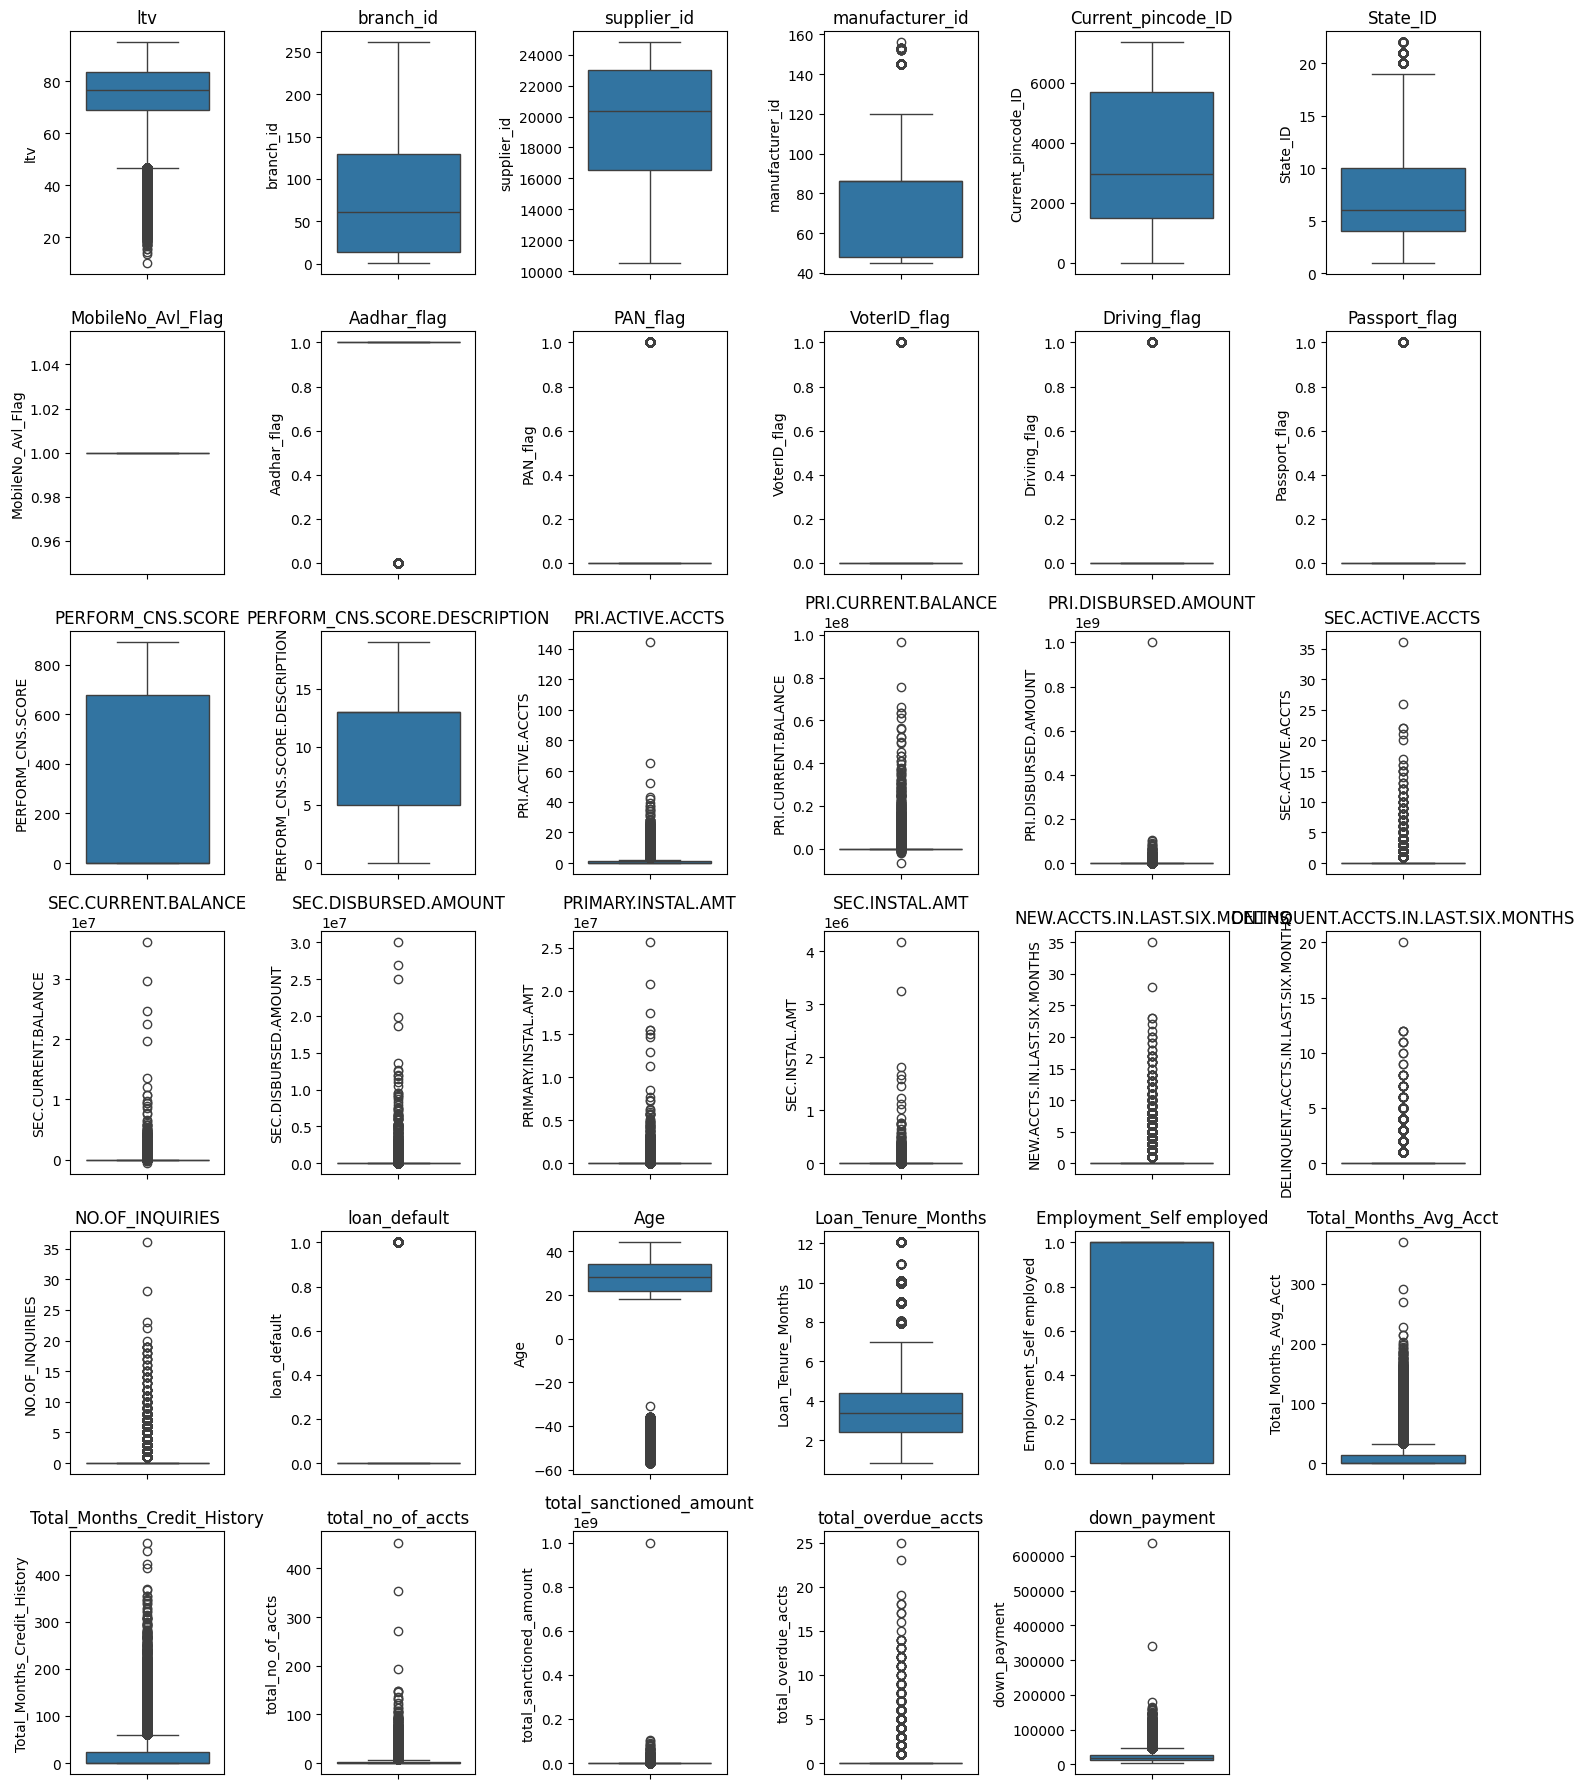

In [ ]:
num_cols = 6
num_rows = int(np.ceil(len(df.columns) / num_cols))

plt.figure(figsize=(15, num_rows * 3))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['ltv', 'branch_id', 'supplier_id', 'manufacturer_id',
       'Current_pincode_ID', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.DISBURSED.AMOUNT',
       'SEC.ACTIVE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'Loan_Tenure_Months', 'Employment_Self employed',
       'Total_Months_Avg_Acct', 'Total_Months_Credit_History',
       'total_no_of_accts', 'total_sanctioned_amount', 'total_overdue_accts',
       'down_payment'],
      dtype='object')

In [ ]:
'''
There is a lot of outliers so, I have used Models like Decision trees and
Random Forest as they are robust to outliers.
'''

'\nThere is a lot of outliers so, I have used Models like Decision trees and\nRandom Forest as they are robust to outliers.\n'

In [ ]:
y = df['loan_default']
X = df.drop('loan_default', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_clf = DecisionTreeClassifier(random_state=40)
d_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=40)

In [ ]:
y_pred_dt = d_clf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt * 100}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")

Decision Tree Accuracy: 67.10986253779674
Precision: 0.27
Recall: 0.29
F1 Score: 0.28


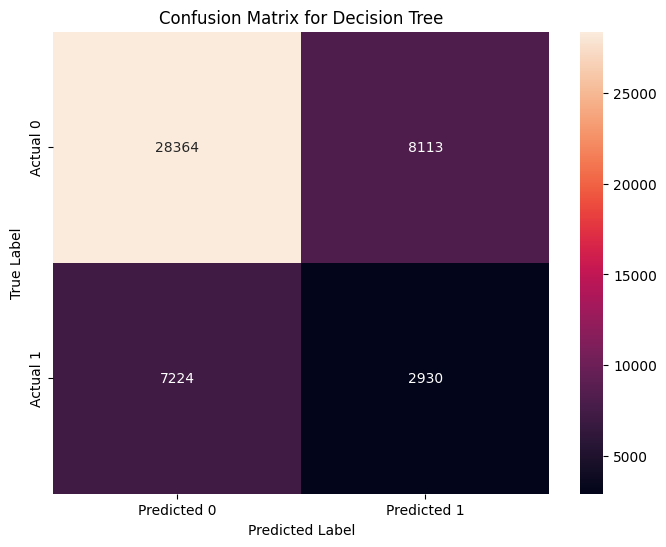

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_scaled)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Random Forest Accuracy: 78.00175848684351
Precision: 0.44
Recall: 0.04
F1 Score: 0.07


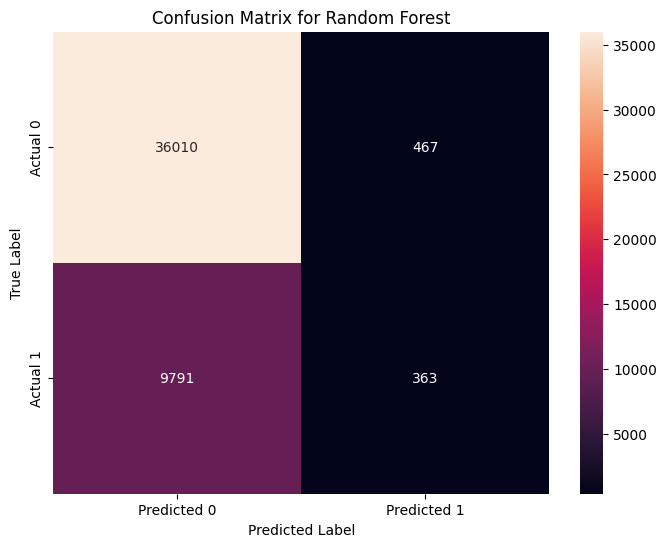

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()